In [3]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.4 MB/s eta 0:01:50
   ---------------------------------------- 0.1/150.0 MB 1.5 MB/s eta 0:01:41
   ---------------------------------------- 0.3/150.0 MB 2.3 MB/s eta 0:01:04
   ---------------------------------------- 0.5/150.0 MB 3.3 MB/s eta 0:00:45
   ---------------------------------------- 0.8/150.0 MB 3.9 MB/s eta 0:00:39
   ---------------------------------------- 1.1/150.0 MB 4.3 MB/s eta 0:00:35
   ---------------------------------------- 1.3/150.0 MB 4.4 MB/s eta 0:00:35
   ---------------------------------------- 1.6/150.0 MB 4.5 MB/s eta 0:00:33
   ---------------------------------------- 1.8/150.0 MB 4.6 MB/s eta 0:00:33
    --------------------------------------- 2.1/150.0 MB 4.7 MB/s eta 0:00:32
    --------------------------------------- 2.3/150.0 MB 4.7 MB/s eta 0:00:32
    --------------------------------------- 2.6/150.0 MB 4.8 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [6]:
X = pd.read_csv('X_resampled.csv')
y = pd.read_csv('y_resampled.csv').squeeze()

In [7]:
# 80% Train, 10% Validation, 10% Test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=42, stratify=y_temp)

In [8]:
print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

Train size: 10826
Validation size: 1354
Test size: 1354


In [14]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

In [19]:
# Manual grid search
best_score = 0
best_params = {}
for combo in itertools.product(*param_grid.values()):
    params = dict(zip(param_grid.keys(), combo))
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', **params)
    model.fit(X_train, y_train)
    val_pred = model.predict(X_val)
    score = accuracy_score(y_val, val_pred)
    
    if score > best_score:
        best_score = score
        best_params = params
        best_model = model

c:\Users\ayank_hyn0aug\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:17:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayank_hyn0aug\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:17:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayank_hyn0aug\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:17:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\ayank_hyn0aug\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarni

In [20]:
print("Best Validation Accuracy:", best_score)
print("Best Parameters:", best_params)

Best Validation Accuracy: 0.9985228951255539
Best Parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'subsample': 1, 'colsample_bytree': 1}


In [21]:
# Final evaluation on test set
y_pred = best_model.predict(X_train)
print("\nTraining Accuracy:", accuracy_score(y_train, y_pred))
print("\nClassification Report:\n", classification_report(y_train, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_pred))


Training Accuracy: 0.9998152595603178

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5413
           1       1.00      1.00      1.00      5413

    accuracy                           1.00     10826
   macro avg       1.00      1.00      1.00     10826
weighted avg       1.00      1.00      1.00     10826


Confusion Matrix:
 [[5413    0]
 [   2 5411]]


In [22]:
# Final evaluation on test set
y_pred = best_model.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9903988183161004

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       677
           1       0.99      0.99      0.99       677

    accuracy                           0.99      1354
   macro avg       0.99      0.99      0.99      1354
weighted avg       0.99      0.99      0.99      1354


Confusion Matrix:
 [[669   8]
 [  5 672]]


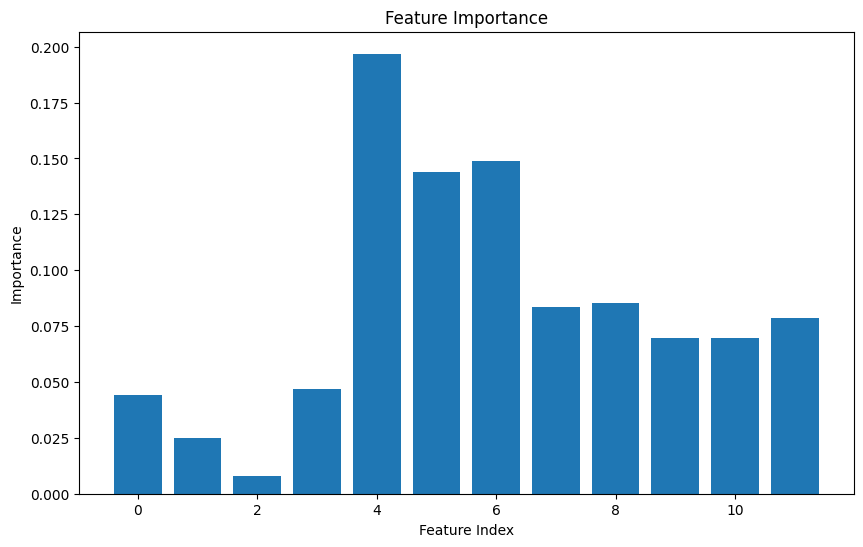

In [23]:
# Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(best_model.feature_importances_)), best_model.feature_importances_)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()